In [146]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [147]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [148]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# Setting the number of categories

In [149]:
NUM_CLASSES = 9

# Load learning data

In [150]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [151]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# model building

In [153]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [154]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_24 (Dropout)        (None, 42)                0         
                                                                 
 dense_36 (Dense)            (None, 20)                860       
                                                                 
 dropout_25 (Dropout)        (None, 20)                0         
                                                                 
 dense_37 (Dense)            (None, 10)                210       
                                                                 
 dense_38 (Dense)            (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [155]:
# Model Checkpoint Callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Early Abort Callback
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [156]:
# model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# model training

In [157]:
# Update number of classes
NUM_CLASSES = 9  # Update to the correct number of classes

# Rebuild model with correct number of output classes
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
17/29 [================>.............] - ETA: 0s - loss: 2.2233 - accuracy: 0.1673 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.keras
29/29 [==============================] - 2s 16ms/step - loss: 2.1696 - accuracy: 0.1939 - val_loss: 1.9831 - val_accuracy: 0.3027
Epoch 2/1000
18/29 [=================>............] - ETA: 0s - loss: 1.9575 - accuracy: 0.3060
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.keras
29/29 [==============================] - 0s 8ms/step - loss: 1.9264 - accuracy: 0.3192 - val_loss: 1.7830 - val_accuracy: 0.3391
Epoch 3/1000
18/29 [=================>............] - ETA: 0s - loss: 1.7698 - accuracy: 0.3746
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.keras
29/29 [==============================] - 0s 7ms/step - loss: 1.7484 - accuracy: 0.3749 - val_loss: 1.5994 - val_accuracy: 0.4657
Epoch 4/1000
20/29 [===================>..........] - ETA: 0s - loss: 1.6106 - accuracy: 0.4

In [158]:
# model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 4ms/step - loss: 0.2341 - accuracy: 0.9735


In [159]:
# Loading a saved model
model = tf.keras.models.load_model(model_save_path)

In [160]:
# Reasoning test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 150ms/step
[3.6496944e-03 1.1047348e-01 8.8587207e-01 3.2481228e-06 1.4951391e-06
 1.1988017e-08 8.5190172e-10 3.4022928e-08 3.0903575e-08]
2


# Mixed rows

38/38 [==============================] - 0s 3ms/step


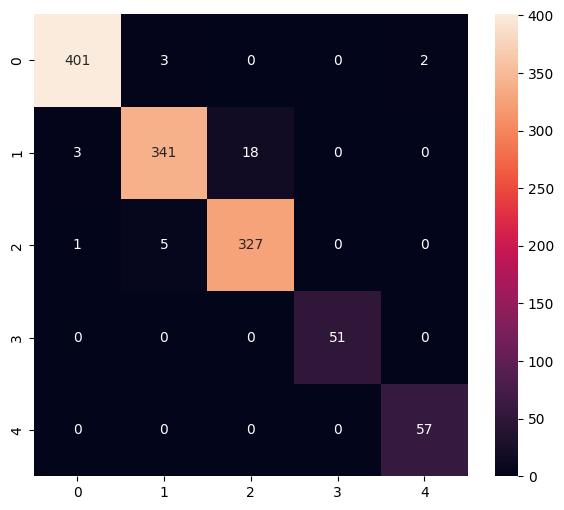

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       406
           1       0.98      0.94      0.96       362
           2       0.95      0.98      0.96       333
           3       1.00      1.00      1.00        51
           4       0.97      1.00      0.98        57

    accuracy                           0.97      1209
   macro avg       0.98      0.98      0.98      1209
weighted avg       0.97      0.97      0.97      1209



In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite Convert to a model for

In [162]:
# Save as an inference-only model
model.save(model_save_path, include_optimizer=False)

In [163]:
# Transform the model (quantize it)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Abhis\AppData\Local\Temp\tmptwj2z6pi\assets


INFO:tensorflow:Assets written to: C:\Users\Abhis\AppData\Local\Temp\tmptwj2z6pi\assets


6844

# Reasoning test

In [164]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [165]:
# Get input/output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [166]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [167]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [168]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.6496941e-03 1.1047346e-01 8.8587201e-01 3.2481225e-06 1.4951389e-06
 1.1988016e-08 8.5190166e-10 3.4022925e-08 3.0903571e-08]
2


# Specify each path

In [169]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# Setting the number of categories

In [170]:
NUM_CLASSES = 9

# Load learning data

In [171]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [172]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# model building

In [174]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [175]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_28 (Dropout)        (None, 42)                0         
                                                                 
 dense_42 (Dense)            (None, 20)                860       
                                                                 
 dropout_29 (Dropout)        (None, 20)                0         
                                                                 
 dense_43 (Dense)            (None, 10)                210       
                                                                 
 dense_44 (Dense)            (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [176]:
# Model Checkpoint Callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Early Abort Callback
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [177]:
# model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# model training

In [178]:
# Update number of classes
NUM_CLASSES = 9  # Update to the correct number of classes

# Rebuild model with correct number of output classes
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
29/29 [==============================] - ETA: 0s - loss: 2.3488 - accuracy: 0.0403
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.keras
29/29 [==============================] - 2s 21ms/step - loss: 2.3488 - accuracy: 0.0403 - val_loss: 2.1497 - val_accuracy: 0.1456
Epoch 2/1000
16/29 [===============>..............] - ETA: 0s - loss: 2.1838 - accuracy: 0.1445
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.keras
29/29 [==============================] - 0s 8ms/step - loss: 2.1600 - accuracy: 0.1876 - val_loss: 2.0753 - val_accuracy: 0.3424
Epoch 3/1000
16/29 [===============>..............] - ETA: 0s - loss: 2.0720 - accuracy: 0.3071
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.keras
29/29 [==============================] - 0s 8ms/step - loss: 2.0492 - accuracy: 0.3225 - val_loss: 1.9845 - val_accuracy: 0.4094
Epoch 4/1000
29/29 [==============================] - ETA: 0s - loss: 1.9068 - accuracy: 0.38

In [179]:
# model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 3ms/step - loss: 0.2835 - accuracy: 0.9132


In [180]:
# Loading a saved model
model = tf.keras.models.load_model(model_save_path)

In [181]:
# Reasoning test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 115ms/step
[2.0987103e-02 1.1456663e-01 8.6430454e-01 2.9344368e-05 1.0747953e-04
 1.7727848e-06 8.5080273e-08 1.9163933e-06 1.1129281e-06]
2


# Mixed rows

38/38 [==============================] - 0s 2ms/step


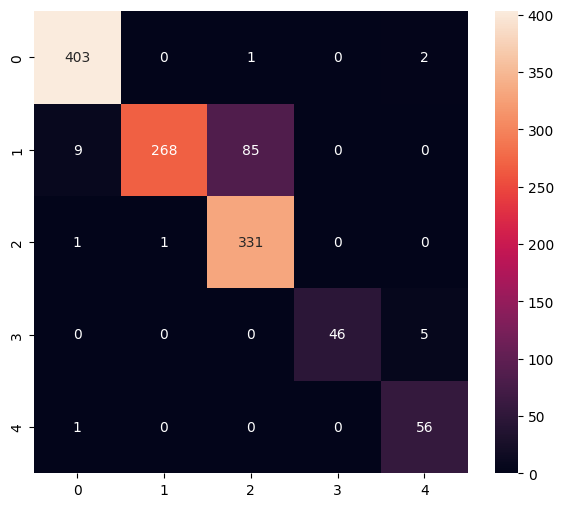

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       406
           1       1.00      0.74      0.85       362
           2       0.79      0.99      0.88       333
           3       1.00      0.90      0.95        51
           4       0.89      0.98      0.93        57

    accuracy                           0.91      1209
   macro avg       0.93      0.92      0.92      1209
weighted avg       0.93      0.91      0.91      1209



In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite Convert to a model for

In [183]:
# Save as an inference-only model
model.save(model_save_path, include_optimizer=False)

In [184]:
# Transform the model (quantize it)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Abhis\AppData\Local\Temp\tmp12aqbk0p\assets


INFO:tensorflow:Assets written to: C:\Users\Abhis\AppData\Local\Temp\tmp12aqbk0p\assets


6844

# Reasoning test

In [185]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [186]:
# Get input/output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [187]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [188]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [189]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [190]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# Setting the number of categories

In [191]:
NUM_CLASSES = 9

# Load learning data

In [192]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [193]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# model building

In [195]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [196]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_32 (Dropout)        (None, 42)                0         
                                                                 
 dense_48 (Dense)            (None, 20)                860       
                                                                 
 dropout_33 (Dropout)        (None, 20)                0         
                                                                 
 dense_49 (Dense)            (None, 10)                210       
                                                                 
 dense_50 (Dense)            (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [197]:
# Model Checkpoint Callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Early Abort Callback
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [198]:
# model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# model training

In [199]:
# Update number of classes
NUM_CLASSES = 9  # Update to the correct number of classes

# Rebuild model with correct number of output classes
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
19/29 [==================>...........] - ETA: 0s - loss: 2.1462 - accuracy: 0.2035 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.keras
29/29 [==============================] - 2s 16ms/step - loss: 2.0872 - accuracy: 0.2262 - val_loss: 1.8742 - val_accuracy: 0.3251
Epoch 2/1000
21/29 [====================>.........] - ETA: 0s - loss: 1.8174 - accuracy: 0.3274
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.keras
29/29 [==============================] - 0s 6ms/step - loss: 1.7849 - accuracy: 0.3396 - val_loss: 1.6386 - val_accuracy: 0.3135
Epoch 3/1000
27/29 [==========================>...] - ETA: 0s - loss: 1.5885 - accuracy: 0.3762
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.keras
29/29 [==============================] - 0s 8ms/step - loss: 1.5875 - accuracy: 0.3757 - val_loss: 1.4491 - val_accuracy: 0.3747
Epoch 4/1000
18/29 [=================>............] - ETA: 0s - loss: 1.4799 - accuracy: 0.3

In [200]:
# model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 3ms/step - loss: 0.2157 - accuracy: 0.9487


In [201]:
# Loading a saved model
model = tf.keras.models.load_model(model_save_path)

In [202]:
# Reasoning test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 101ms/step
[1.5551547e-03 5.2688316e-02 9.4566381e-01 8.2769555e-05 9.9564868e-06
 2.0259586e-08 2.2447912e-08 4.6472408e-08 3.0307485e-09]
2


# Mixed rows

38/38 [==============================] - 0s 2ms/step


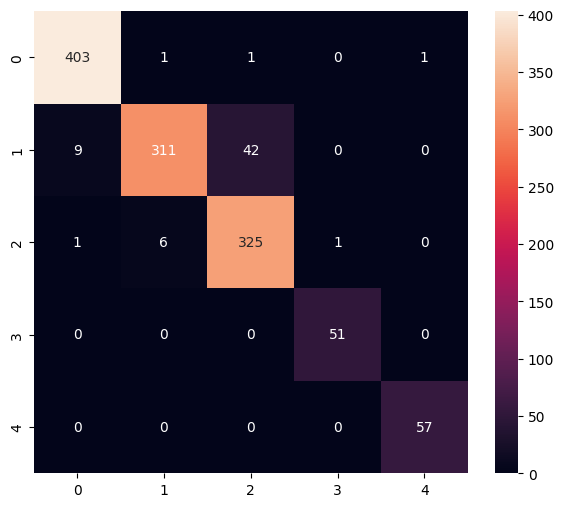

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       406
           1       0.98      0.86      0.91       362
           2       0.88      0.98      0.93       333
           3       0.98      1.00      0.99        51
           4       0.98      1.00      0.99        57

    accuracy                           0.95      1209
   macro avg       0.96      0.97      0.96      1209
weighted avg       0.95      0.95      0.95      1209



In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite Convert to a model for

In [204]:
# Save as an inference-only model
model.save(model_save_path, include_optimizer=False)

In [205]:
# Transform the model (quantize it)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Abhis\AppData\Local\Temp\tmpr8xpgew1\assets


INFO:tensorflow:Assets written to: C:\Users\Abhis\AppData\Local\Temp\tmpr8xpgew1\assets


6844

# Reasoning test

In [206]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [207]:
# Get input/output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [208]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [209]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [210]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.5551542e-03 5.2688297e-02 9.4566369e-01 8.2769628e-05 9.9565041e-06
 2.0259623e-08 2.2447953e-08 4.6472397e-08 3.0307536e-09]
2


In [211]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.5551542e-03 5.2688297e-02 9.4566369e-01 8.2769628e-05 9.9565041e-06
 2.0259623e-08 2.2447953e-08 4.6472397e-08 3.0307536e-09]
2
